# Recorte Ação

In [1]:
# Importando bibliotecas necessárias para a construção de grafos
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
import pandas as pd
import numpy as np
import csv
import ast
import cpnet
from graph_tool import spectral
import seaborn as sns
import regression as reg
import cpnet

from scipy import stats
from matplotlib import pyplot as plt
from graph_tool import centrality
from graph_tool import spectral

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/usr/local/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1582: PendingDeprecationWarning: The register_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1583: PendingDeprecationWarning: The register_cmap function will b

In [2]:
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
df.dropna(subset=['Publisher'], inplace=True)
df = df.loc[~df['Critic_Score'].isna() & ~df['User_Score'].isna() & ~df['Rating'].isna()]

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [4]:
df_recortado = df.loc[(df['Genre'] == 'Action')] 

In [5]:
df_recortado.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9.0,1588.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,8.7,730.0,Rockstar North,M
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,97.0,56.0,8.5,664.0,DMA Design,M


In [6]:
df_recortado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 16 to 16696
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1663 non-null   object 
 1   Platform         1663 non-null   object 
 2   Year_of_Release  1630 non-null   float64
 3   Genre            1663 non-null   object 
 4   Publisher        1663 non-null   object 
 5   NA_Sales         1663 non-null   float64
 6   EU_Sales         1663 non-null   float64
 7   JP_Sales         1663 non-null   float64
 8   Other_Sales      1663 non-null   float64
 9   Global_Sales     1663 non-null   float64
 10  Critic_Score     1663 non-null   float64
 11  Critic_Count     1663 non-null   float64
 12  User_Score       1663 non-null   float64
 13  User_Count       1663 non-null   float64
 14  Developer        1663 non-null   object 
 15  Rating           1663 non-null   object 
dtypes: float64(10), object(6)
memory usage: 220.9+ KB


In [7]:
publishers = df_recortado["Publisher"].unique()

In [8]:
action_graph = Graph(directed=False) # não-dirigido
action_graph.add_vp('Publisher')
action_graph.add_vp('Games_released')
action_graph.add_ep('strength')

for pub in publishers:
    action_graph.add_vertex(pub)
    action_graph.get_vertex(pub)['Publisher'] = pub
    num_games = df_recortado['Name'].loc[df_recortado["Publisher"] == pub].nunique() 
    action_graph.get_vertex(pub)['Games_released'] = num_games

In [9]:
sorted_years = list(range(1985, 2017))
print(sorted_years)

[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [10]:
df_list = []

margem = 4
for i in range(0, len(sorted_years), margem):
    df_list.append(df_recortado[df_recortado['Year_of_Release'].isin(sorted_years[i:i+margem])])

In [11]:
publisher_platforms = []
for db in df_list:
    publisher_platforms.append(db.groupby('Platform')['Publisher'].unique().to_dict())

In [12]:
for platform_dict in publisher_platforms:
    for platform, publishers in platform_dict.items():
        for i in range(len(publishers)):
            if i != len(publishers)-1:
                next_vertex = i+1
                while(next_vertex < len(publishers)):
                    if(publishers[i] != publishers[next_vertex] and not action_graph.has_edge(publishers[i], publishers[next_vertex])):
                        action_graph.add_edge(publishers[i], publishers[next_vertex])
                        action_graph.get_edge(publishers[i], publishers[next_vertex])['strength'] = 1
                        next_vertex += 1
                    else:
                        action_graph.get_edge(publishers[i], publishers[next_vertex])['strength'] += 1
                        next_vertex += 1

In [13]:
print('número de vértices de g:', action_graph.num_vertices())

número de vértices de g: 100


In [14]:
print('número de arestaas de g:', action_graph.num_edges())

número de arestaas de g: 1914


In [15]:
gt_save(action_graph, 'action_graph.net.gz')

In [16]:
g = gt_load('action_graph.net.gz')
g = gt_clean(g)
cc = centrality.closeness(g)
g.add_vp('closeness', cc)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'action_sfdp.net.gz')

# Análise

<AxesSubplot: xlabel='Global_Sales', ylabel='Count'>

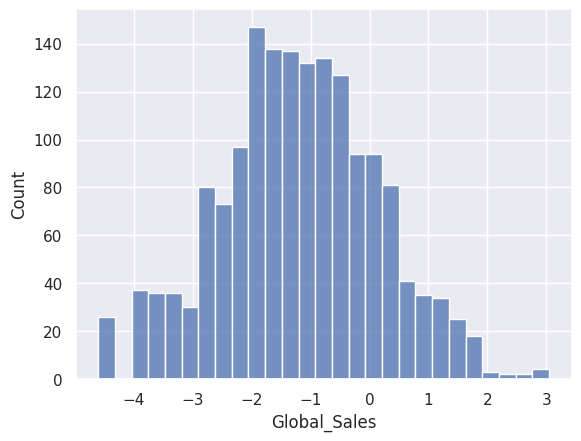

In [17]:
sns.histplot(np.log(df_recortado['Global_Sales']))

# Faixa etária X Sucesso

In [18]:
df_rat_suc = df_recortado.copy()
df_rat_suc.loc[df_rat_suc['Rating'] == 'E', 'Rating'] = 1
df_rat_suc.loc[df_rat_suc['Rating'] == 'E10+', 'Rating'] = 1
df_rat_suc.loc[df_rat_suc['Rating'] == 'K-A', 'Rating'] = 1
df_rat_suc.loc[df_rat_suc['Rating'] == 'M', 'Rating'] = 0
df_rat_suc.loc[df_rat_suc['Rating'] == 'T', 'Rating'] = 0
df_rat_suc.loc[df_rat_suc['Rating'] == 'AO', 'Rating'] = 0
df_rat_suc.loc[df_rat_suc['Rating'] == 'RP', 'Rating'] = 0

/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


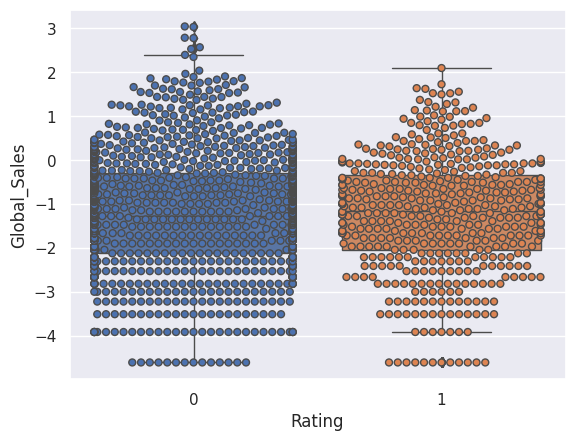

In [19]:
sns.boxplot(x=df_rat_suc['Rating'], y=np.log(df_rat_suc['Global_Sales']), linewidth=1)
sns.swarmplot(x=df_rat_suc['Rating'], y=np.log(df_rat_suc['Global_Sales']), linewidth=1);

In [20]:
result = reg.linear(data=df_rat_suc, formula='np.log(Global_Sales) ~ Rating')

In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Global_Sales)   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                   0.06480
Date:                  Tue, 15 Nov 2022   Prob (F-statistic):              0.799
Time:                          15:39:09   Log-Likelihood:                -2857.1
No. Observations:                  1663   AIC:                             5718.
Df Residuals:                      1661   BIC:                             5729.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.2000      0.040    -30.301      0.000      -1.278      -1.122
Rating[T.1]    -0.0183      0.072     -0.255      0.799      -0.160       0.123
==============================================================================
Omnibus:                        0.088   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.139
Skew:                          -0.005   Prob(JB):                        0.933
Kurtosis:                       2.956   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
result.nano_summary()

-0.018 (0.072)


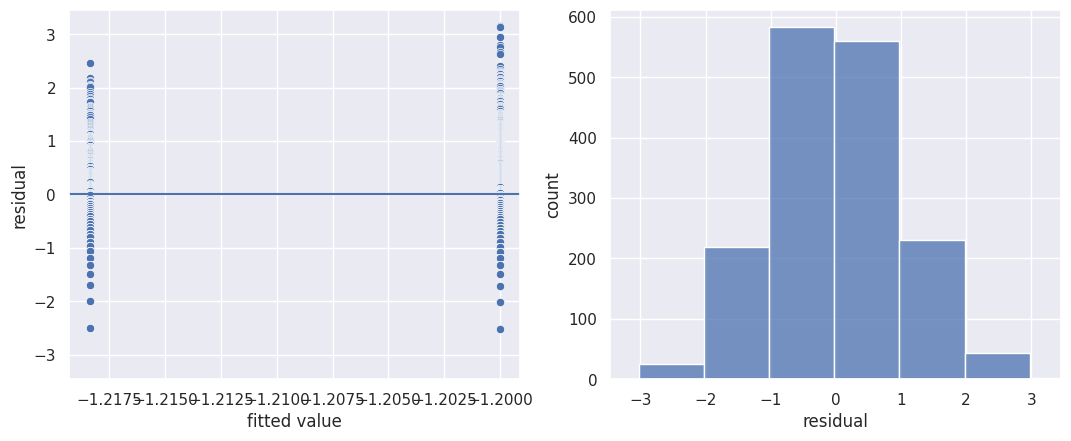

In [23]:
result.plot_residuals()